<a href="https://colab.research.google.com/github/tachidok/multifractal_breaKHist/blob/main/Multifractal_based_on_slide_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer cells classification based on multifractal dimension

# Install non default packages

In [1]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install -U lazypredict

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 302 kB 6.9 MB/s 
     |████████████████████████████████| 269 kB 47.4 MB/s 
     |████████████████████████████████| 127.6 MB 19 kB/s 
     |████████████████████████████████| 1.2 MB 36.0 MB/s 
     |████████████████████████████████| 248 kB 69.3 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 6.8 MB 18.5 MB/s 
     |████████████████████████████████| 25.9 MB 70.3 MB/s 
     |████████████████████████████████| 10.1 MB 17.1 MB/s 
     |████████████████████████████████| 14.5 MB 11.7 MB/s 
  Created wheel for PyYAML: filename=

# Import packages

In [30]:
import os
import sys

# Basic plotting
import numpy as np
#import cv2
import pylab as pl
from matplotlib import pyplot as plt

# Basic data base management and statistical tools
import pandas as pd
#import seaborn as sns

# Classification tools
from sklearn.model_selection import train_test_split

# Classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut

# Metrics and tools
from sklearn import preprocessing
# Metrics (accuracy, precision, recall, F_beta, AUC)
from sklearn import metrics
# Get the time for each classifier
from time import time

# Manage unbalance data
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

# Visualization
from sklearn import tree

# AutoML
#import autosklearn.classification
from lazypredict.Supervised import LazyClassifier

# Load data

## Load from local device (not used in colab)

In [ ]:
#df = pd.read_csv('../data/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/02_csv_06052021/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/03_csv_files_bc_p23/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/04_csv_files_bc_p456/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/05_csv_files_seg_bc234/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/06_csv_files_heq_seg_bc234_log/csvfile_all.csv')
#df = pd.read_csv('../data/csv_files/07_csv_files_heq_segthadapt_bc234_log/csvfile_all.csv')

## Load to Google Drive from local file system using Python code (not used in colab)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

### Load data

In [ ]:
#df = pd.read_csv('csvfile_all.csv')

## Load from Google Drive (used in colab)

### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Where are we? (current path)

In [ ]:
#!pwd

### Load data from Google Drive

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/cancer/csv_files/06_csv_files_heq_seg__bc_234_log/csvfile_all.csv')

# Output dataframe

In [31]:
# Output the data frame
df

,index,path,image_name,magnification,fd_canny_100_200,fd_canny_150_250_as5,tumor_class,tumor_type,slide_id
0,0,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-40-010.png,40,1.20,1.29,M,MC,13418DE
1,1,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-40-012.png,40,1.16,1.25,M,MC,13418DE
2,2,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-400-011.png,400,1.10,1.15,M,MC,13418DE
3,3,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-400-005.png,400,1.07,1.12,M,MC,13418DE
4,4,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-200-008.png,200,1.04,1.09,M,MC,13418DE
...,...,...,...,...,...,...,...,...,...
7904,7904,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-200-025.png,200,1.00,1.07,B,TA,16184
7905,7905,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-024.png,100,1.04,1.09,B,TA,16184
7906,7906,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-015.png,100,1.05,1.10,B,TA,16184
7907,7907,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-030.png,100,1.04,1.10,B,TA,16184


# Pre-process data frames
1. Get the number of registers prior to pre-processing
2. Drop 'NaN' entries
3. Drop duplicates
4. Get the final number of registers post pre-processing

In [5]:
# Get the number of registers
n_registers_prior_preprocessing = df.shape
# Drop 'NaN' entries
df = df.dropna()
# Drop duplicates
df = df.drop_duplicates()
# Drop the column called unnamed, do the operation "inplace", that means in the same DataFrame, and remove the "axis=1", that means the column, not the row
#df.drop("0", inplace = True, axis = 1)#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
#disp.plot()
#plt.title("Confusion matrix")
#plt.figure(figsize=(10,10))
#plt.show()
#df = df.reset_index()
n_registers_post_preprocessing = df.shape
print(f"Number of registers prior pre-processing {n_registers_prior_preprocessing}")
print(f"Number of registers post pre-processing {n_registers_post_preprocessing}")

Number of registers prior pre-processing (7909, 8)
Number of registers post pre-processing (7909, 8)


# Get information about the dataset
* Number of samples for each tumor class or tumor type

* Tumor type

  * A = Adenosis
  * F = Fibroadenoma
  * TA = Tubular Adenoma
  * PT = Phyllodes Tumor

  * DC = Ductal Carcicoma
  * LC = Lobular Carcicoma
  * MC = Mucinous Carcicoma (Colloid)
  * PC = Papillary Carcicoma

* Tumor class

  * B = Benign
  * M = Malign


In [6]:
# Count the number of instances of each tumor type
print("Full dataset: Number of instances for each tumor type")
print(df['tumor_type'].value_counts())

# Count the number of instances of each tumor class
print("\nFull dataset: Number of instances for each tumor class")
print(df['tumor_class'].value_counts())

# Create groups based on magnification
groups_by_magnification = df.groupby('magnification')

# Get the groups by magnification
group_40x = groups_by_magnification.get_group(40)
group_100x = groups_by_magnification.get_group(100)
group_200x = groups_by_magnification.get_group(200)
group_400x = groups_by_magnification.get_group(400)

# Describe the sub-dataset
print("\n\n40x dataset: describe()")
print(group_40x['tumor_type'].describe())
# Get the number of instances of each tumor type for this magnification
print("\n40x dataset: Number of instances for each tumor type")
print(group_40x['tumor_type'].value_counts())
# Get the number of instances of each tumor class for this magnification
print("\n40x dataset: Number of instances for each tumor class")
print(group_40x['tumor_class'].value_counts())

# Describe the sub-dataset
print("\n\n100x dataset: describe()")
print(group_100x['tumor_type'].describe())
# Get the number of instances of each tumor type for this magnification
print("\n100x dataset: Number of instances for each tumor type")
print(group_100x['tumor_type'].value_counts())
# Get the number of instances of each tumor class for this magnification
print("\n100x dataset: Number of instances for each tumor class")
print(group_100x['tumor_class'].value_counts())

# Describe the sub-dataset
print("\n\n200x dataset: describe()")
print(group_200x['tumor_type'].describe())
# Get the number of instances of each tumor type for this magnification
print("\n200x dataset: Number of instances for each tumor type")
print(group_200x['tumor_type'].value_counts())
# Get the number of instances of each tumor class for this magnification
print("\n200x dataset: Number of instances for each tumor class")
print(group_200x['tumor_class'].value_counts())

# Describe the sub-dataset
print("\n\n400x dataset: describe()")
print(group_400x['tumor_type'].describe())
# Get the number of instances of each tumor type for this magnification
print("\n400x dataset: Number of instances for each tumor type")
print(group_400x['tumor_type'].value_counts())
# Get the number of instances of each tumor class for this magnification
print("\n400x dataset: Number of instances for each tumor class")
print(group_400x['tumor_class'].value_counts())

Full dataset: Number of instances for each tumor type
DC    3451
F     1014
MC     792
LC     626
TA     569
PC     560
PT     453
A      444
Name: tumor_type, dtype: int64

Full dataset: Number of instances for each tumor class
M    5429
B    2480
Name: tumor_class, dtype: int64


40x dataset: describe()
count     1995
unique       8
top         DC
freq       864
Name: tumor_type, dtype: object

40x dataset: Number of instances for each tumor type
DC    864
F     253
MC    205
LC    156
TA    149
PC    145
A     114
PT    109
Name: tumor_type, dtype: int64

40x dataset: Number of instances for each tumor class
M    1370
B     625
Name: tumor_class, dtype: int64


100x dataset: describe()
count     2081
unique       8
top         DC
freq       903
Name: tumor_type, dtype: object

100x dataset: Number of instances for each tumor type
DC    903
F     260
MC    222
LC    170
TA    150
PC    142
PT    121
A     113
Name: tumor_type, dtype: int64

100x dataset: Number of instances for each 

# Plot data as it is!!!

## Print the name of the columns

In [ ]:
print(df.columns)

## Plot Image vs fd_canny_100_200

In [ ]:
ax1 = df.plot.scatter(x='index', y='fd_canny_100_200')

## Plot Image vs fd_canny_150_250_as5

In [ ]:
ax2 = df.plot.scatter(x='index', y='fd_canny_150_250_as5')

## Plot fd_canny_100_200 vs fd_canny_150_250_as5

In [ ]:
ax3 = df.plot.scatter(x='fd_canny_100_200', y='fd_canny_150_250_as5')
#df.plot.scatter(x='index',y='magnification')

# Strategy to create the new data frame

1.   Extract the slide ID/patient ID and add it into the data frame
2.   Split observations based on patients IDs/slides IDs
3.   Split the patients sub-groups per magninfication
4.   Create as many combinations as possible (memory constraints) by taking one element of each magnification sub-group
5.   For each combination assign a tumor type and tumor class based on the patient IDs/slides IDs labels

## Extract the slide ID/patient ID from the image name and add it as a new column to the data set

In [32]:
# Get the image name column into a numpy array
names_array = df['image_name'].to_numpy()
# Get the number of elements in the column
n_names = len(names_array)
# Create an empty list
list_slide_ids = []#np.empty(n_names)
#list_figure_number = []#np.empty(n_names)

# Loop over all images
for i in range(n_names):

  # Get the full name of the image
  image_name = names_array[i]

  # Split the name by '-'
  image_features = image_name.split("-")

  # Append the element at position 2 (which is the slide id)
  list_slide_ids.append(image_features[2])

  # Get the element at position 4 which is the figure number with the image extension [png], then get only the number and forget about the extension
  #list_figure_number.append(image_features[4].split(".")[0])

  #print("Names: %s %s" % (list_slide_ids[i], list_figure_number[i]))

# Add the column to the data frame
df['slide_id'] = list_slide_ids
#df['figure_number'] = list_figure_number

# Show the data frame
df

,index,path,image_name,magnification,fd_canny_100_200,fd_canny_150_250_as5,tumor_class,tumor_type,slide_id
0,0,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-40-010.png,40,1.20,1.29,M,MC,13418DE
1,1,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-40-012.png,40,1.16,1.25,M,MC,13418DE
2,2,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-400-011.png,400,1.10,1.15,M,MC,13418DE
3,3,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-400-005.png,400,1.07,1.12,M,MC,13418DE
4,4,./BreaKHis_v1/histology_slides/breast/malignan...,SOB_M_MC-14-13418DE-200-008.png,200,1.04,1.09,M,MC,13418DE
...,...,...,...,...,...,...,...,...,...
7904,7904,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-200-025.png,200,1.00,1.07,B,TA,16184
7905,7905,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-024.png,100,1.04,1.09,B,TA,16184
7906,7906,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-015.png,100,1.05,1.10,B,TA,16184
7907,7907,./BreaKHis_v1/histology_slides/breast/benign/S...,SOB_B_TA-14-16184-100-030.png,100,1.04,1.10,B,TA,16184


## Drop columns and create a new data frame from groups

1. Drop 'path' and 'image_name' columns
2. Create groups by slide ids, then create subgroups by magnification and combine data into a single observation

 * Each row or observation in the data frame has the following structure

    * Canny feature for 40x - 01
    * Canny feature for 40x - 02
    * Canny feature for 100x - 01
    * Canny feature for 100x - 02
    * Canny feature for 200x - 01
    * Canny feature for 200x - 02
    * Canny feature for 400x - 01
    * Canny feature for 400x - 02
    * Tumor class
    * Tumor type

  The variable 'n_max_ele_per_group' constraint the number of images to take for each magnification group. This is used due to memory constraints.

In [33]:
# Rewrite this section by using the itertools package that implements the cartesian product of multiple sets

# https://www.geeksforgeeks.org/python-itertools-product/

# Sort the data frame by slide ids
#sorted_df = df.sort_values('slide_id', ascending=False)
# Drop the path of the image and the full image name
reduced_df = df.drop(columns=['path', 'image_name'])
# Create groups by the slide ids
group_df = reduced_df.groupby('slide_id')

# The list to store the new data (get both canny features for each magnification)
list_magnification_40x_canny_01 = []
list_magnification_40x_canny_02 = []
list_magnification_100x_canny_01 = []
list_magnification_100x_canny_02 = []
list_magnification_200x_canny_01 = []
list_magnification_200x_canny_02 = []
list_magnification_400x_canny_01 = []
list_magnification_400x_canny_02 = []
# Also include the tumor class and the tumor type
list_tumor_class = []
list_tumor_type = []

counter = 0

# List the groups
for slide_id, group in group_df:

  print(f"Slide id: {slide_id}")
  print("Patient number: %d" % counter)
  counter += 1

  # Create groups based on magnification
  sub_groups_by_magnification = group.groupby('magnification')

  # Get the groups by magnification
  group_40x = sub_groups_by_magnification.get_group(40)
  group_100x = sub_groups_by_magnification.get_group(100)
  group_200x = sub_groups_by_magnification.get_group(200)
  group_400x = sub_groups_by_magnification.get_group(400)

  # Get a numpy representation of the columns with the canny features
  canny_values_01_40x = group_40x['fd_canny_100_200'].to_numpy()
  canny_values_02_40x = group_40x['fd_canny_150_250_as5'].to_numpy()
  canny_values_01_100x = group_100x['fd_canny_100_200'].to_numpy()
  canny_values_02_100x = group_100x['fd_canny_150_250_as5'].to_numpy()
  canny_values_01_200x = group_200x['fd_canny_100_200'].to_numpy()
  canny_values_02_200x = group_200x['fd_canny_150_250_as5'].to_numpy()
  canny_values_01_400x = group_400x['fd_canny_100_200'].to_numpy()
  canny_values_02_400x = group_400x['fd_canny_150_250_as5'].to_numpy()

  # Get a numpy representation of the columns with the tumor class and tumor type, all the tumor class and tumor type are the same
  tumor_class_np = group_40x['tumor_class'].to_numpy()
  tumor_type_np = group_40x['tumor_type'].to_numpy()

  # Get the number of images per group
  n_images_40x = len(canny_values_01_40x)
  n_images_100x = len(canny_values_01_100x)
  n_images_200x = len(canny_values_01_200x)
  n_images_400x = len(canny_values_01_400x)

  # Print the number of images per each magnification
  print(f"Number of images per 40x {n_images_40x}")
  print(f"Number of images per 100x {n_images_100x}")
  print(f"Number of images per 200x {n_images_200x}")
  print(f"Number of images per 400x {n_images_400x}")

  # Set a maximum number of images to consider per group (this is due to memory limitations)
  n_max_img_per_group = 2

  # Create a new data frame with the combinations of the canny values of the images
  # [canny_40x, canny_40x, canny_100x, canny_100x, canny_200x, canny_200x, canny_400x, canny_400x, tumor_class, tumor_type]
  for i in range(min(n_images_40x, n_max_img_per_group)):
    for j in range(min(n_images_100x, n_max_img_per_group)):
      for k in range(min(n_images_200x, n_max_img_per_group)):
        for m in range(min(n_images_400x, n_max_img_per_group)):

          feature_canny_01_40x = canny_values_01_40x[i]
          feature_canny_02_40x = canny_values_02_40x[i]
          feature_canny_01_100x = canny_values_01_100x[j]
          feature_canny_02_100x = canny_values_02_100x[j]
          feature_canny_01_200x = canny_values_01_200x[k]
          feature_canny_02_200x = canny_values_02_200x[k]
          feature_canny_01_400x = canny_values_01_400x[m]
          feature_canny_02_400x = canny_values_02_400x[m]

          #print(f"Slide id {name}, m40x {feature_canny_01_40x} {feature_canny_02_40x}, m100x {feature_canny_01_100x} {feature_canny_02_100x}, m200x {feature_canny_01_200x} {feature_canny_02_200x}, m400x {feature_canny_01_400x} {feature_canny_02_400x}")
          list_magnification_40x_canny_01.append(feature_canny_01_40x)
          list_magnification_40x_canny_02.append(feature_canny_02_40x)
          list_magnification_100x_canny_01.append(feature_canny_01_100x)
          list_magnification_100x_canny_02.append(feature_canny_02_100x)
          list_magnification_200x_canny_01.append(feature_canny_01_200x)
          list_magnification_200x_canny_02.append(feature_canny_02_200x)
          list_magnification_400x_canny_01.append(feature_canny_01_400x)
          list_magnification_400x_canny_02.append(feature_canny_02_400x)

          # We take the tumor type and class from the 40x image data set, it should be the same for all magnifications
          list_tumor_class.append(tumor_class_np[i])
          list_tumor_type.append(tumor_type_np[i])


Slide id: 10147
Patient number: 0
Number of images per 40x 15
Number of images per 100x 12
Number of images per 200x 22
Number of images per 400x 15
Slide id: 10926
Patient number: 1
Number of images per 40x 11
Number of images per 100x 10
Number of images per 200x 9
Number of images per 400x 9
Slide id: 11031
Patient number: 2
Number of images per 40x 14
Number of images per 100x 17
Number of images per 200x 14
Number of images per 400x 15
Slide id: 11520
Patient number: 3
Number of images per 40x 25
Number of images per 100x 26
Number of images per 200x 24
Number of images per 400x 23
Slide id: 11951
Patient number: 4
Number of images per 40x 27
Number of images per 100x 25
Number of images per 200x 28
Number of images per 400x 20
Slide id: 12204
Patient number: 5
Number of images per 40x 20
Number of images per 100x 31
Number of images per 200x 28
Number of images per 400x 24
Slide id: 12312
Patient number: 6
Number of images per 40x 32
Number of images per 100x 41
Number of images 

## Create the new data frame

In [34]:
# Create the data frame with the new combined data
#new_df = pd.DataFrame([list_magnification_40x_canny_01, list_magnification_40x_canny_02, list_magnification_100x_canny_01, list_magnification_100x_canny_02, list_magnification_200x_canny_01, list_magnification_200x_canny_02, list_magnification_400x_canny_01, list_magnification_400x_canny_02, list_tumor_class, list_tumor_type], columns = ['canny_values_01_40x', 'canny_values_02_40x', 'canny_values_01_100x', 'canny_values_02_100x', 'canny_values_01_200x', 'canny_values_02_200x', 'canny_values_01_400x', 'canny_values_02_400x', 'tumor_class', 'tumor_type'])
new_df = pd.DataFrame()

new_df['canny_values_01_40x'] = list_magnification_40x_canny_01
new_df['canny_values_02_40x'] = list_magnification_40x_canny_02
new_df['canny_values_01_100x'] = list_magnification_100x_canny_01
new_df['canny_values_02_100x'] = list_magnification_100x_canny_02
new_df['canny_values_01_200x'] = list_magnification_200x_canny_01
new_df['canny_values_02_200x'] = list_magnification_200x_canny_02
new_df['canny_values_01_400x'] = list_magnification_400x_canny_01
new_df['canny_values_02_400x'] = list_magnification_400x_canny_02
new_df['tumor_class'] = list_tumor_class
new_df['tumor_type'] = list_tumor_type

new_df

,canny_values_01_40x,canny_values_02_40x,canny_values_01_100x,canny_values_02_100x,canny_values_01_200x,canny_values_02_200x,canny_values_01_400x,canny_values_02_400x,tumor_class,tumor_type
0,1.16,1.25,1.10,1.18,1.02,1.10,1.03,1.08,M,MC
1,1.16,1.25,1.10,1.18,1.02,1.10,0.99,1.02,M,MC
2,1.16,1.25,1.10,1.18,1.07,1.13,1.03,1.08,M,MC
3,1.16,1.25,1.10,1.18,1.07,1.13,0.99,1.02,M,MC
4,1.16,1.25,1.08,1.16,1.02,1.10,1.03,1.08,M,MC
...,...,...,...,...,...,...,...,...,...,...
1283,1.08,1.15,1.00,1.06,1.04,1.06,1.01,1.06,M,DC
1284,1.08,1.15,1.01,1.06,0.98,1.03,1.01,1.05,M,DC
1285,1.08,1.15,1.01,1.06,0.98,1.03,1.01,1.06,M,DC
1286,1.08,1.15,1.01,1.06,1.04,1.06,1.01,1.05,M,DC


# Get information about the new dataset
* Number of instances per tumor class and tumor type

In [35]:
# Describe the dataset
print("\n\nNew dataset: describe()")
print(new_df['tumor_type'].describe())
# Get the number of instances of each tumor type
print("\nNew dataset: Number of instances for each tumor type")
print(new_df['tumor_type'].value_counts())
# Get the number of instances of each tumor class
print("\nNew dataset: Number of instances for each tumor class")
print(new_df['tumor_class'].value_counts())



New dataset: describe()
count     1288
unique       8
top         DC
freq       584
Name: tumor_type, dtype: object

New dataset: Number of instances for each tumor type
DC    584
F     160
MC    144
TA    112
PC     96
LC     80
A      64
PT     48
Name: tumor_type, dtype: int64

New dataset: Number of instances for each tumor class
M    904
B    384
Name: tumor_class, dtype: int64


# Save the new data frame to disk (not run due to large file size)

In [ ]:
# Save the data frame
#new_df.to_csv(rf'csvfile_new_df_grp_max_20.csv')

# Classification

## Data selection
* (Option 1) Tumor type

  * A = Adenosis
  * F = Fibroadenoma
  * TA = Tubular Adenoma
  * PT = Phyllodes Tumor

  * DC = Ductal Carcicoma
  * LC = Lobular Carcicoma
  * MC = Mucinous Carcicoma (Colloid)
  * PC = Papillary Carcicoma

* (Option 2) Tumor class

  * B = Benign
  * M = Malign

### Option 1: Remove the tumor class column


In [ ]:
# Drop the tumor class column
#new_df = new_df.drop(columns=['tumor_class'])
#new_df

### Option 2: Remove the tumor type column



In [36]:
# Drop the tumor class column
new_df = new_df.drop(columns=['tumor_type'])
new_df

,canny_values_01_40x,canny_values_02_40x,canny_values_01_100x,canny_values_02_100x,canny_values_01_200x,canny_values_02_200x,canny_values_01_400x,canny_values_02_400x,tumor_class
0,1.16,1.25,1.10,1.18,1.02,1.10,1.03,1.08,M
1,1.16,1.25,1.10,1.18,1.02,1.10,0.99,1.02,M
2,1.16,1.25,1.10,1.18,1.07,1.13,1.03,1.08,M
3,1.16,1.25,1.10,1.18,1.07,1.13,0.99,1.02,M
4,1.16,1.25,1.08,1.16,1.02,1.10,1.03,1.08,M
...,...,...,...,...,...,...,...,...,...
1283,1.08,1.15,1.00,1.06,1.04,1.06,1.01,1.06,M
1284,1.08,1.15,1.01,1.06,0.98,1.03,1.01,1.05,M
1285,1.08,1.15,1.01,1.06,0.98,1.03,1.01,1.06,M
1286,1.08,1.15,1.01,1.06,1.04,1.06,1.01,1.05,M


## Get information again
* Number of tumor type/class in the dataset

In [ ]:
# Describe the dataset
#print("\n\nNew dataset: describe()")
#print(new_df['tumor_type'].describe())
# Get the number of instances of each tumor type
#print("\nNew dataset: Number of instances for each tumor type")
#print(new_df['tumor_type'].value_counts())

In [37]:
# Describe the dataset
print("\n\nNew dataset: describe()")
#print(new_df['tumor_class'].describe())
# Get the number of instances of each tumor class
print("\nNew dataset: Number of instances for each tumor class")
print(new_df['tumor_class'].value_counts())



New dataset: describe()

New dataset: Number of instances for each tumor class
M    904
B    384
Name: tumor_class, dtype: int64


## Split data intro training and testing groups

* X stores all observations
* y stores all predictions

* X_train stores training group observations
* y_train stores training group predictions

* X_test stores testing group observations
* y_test stores testing group predictions

In [38]:
# Get the observations/input values from the new data frame
#X = np.c_[new_df[['canny_values_01_40x', 'canny_values_02_40x', 'canny_values_01_100x', 'canny_values_02_100x', 'canny_values_01_200x', 'canny_values_02_200x', 'canny_values_01_400x', 'canny_values_02_400x']]]
# Get the predictions (from tge "tumor class" or the "tumor type" column)
#y = np.c_[new_df['tumor_class']]
#y = np.c_[new_df['tumor_type']]

X = new_df[['canny_values_01_40x', 'canny_values_02_40x', 'canny_values_01_100x', 'canny_values_02_100x', 'canny_values_01_200x', 'canny_values_02_200x', 'canny_values_01_400x', 'canny_values_02_400x']]
# Get the predictions (from tge "tumor class" or the "tumor type" column)
y = new_df['tumor_class']
#y = new_df['tumor_type']

# Split the data
percentage_for_test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percentage_for_test_size, shuffle = True)
print("Full dataset size")
print(X.shape)
print(y.shape)

print("\nTraining dataset size")
print(X_train.shape)
print(y_train.shape)
print("\nTesting dataset size")
print(X_test.shape)
print(y_test.shape)

Full dataset size
(1288, 8)
(1288,)

Training dataset size
(901, 8)
(901,)

Testing dataset size
(387, 8)
(387,)


## Pre-processing

### Scaling (training and testing data)

In [39]:
#scaler = preprocessing.MinMaxScaler().fit(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Correct the training vector shape

In [40]:
# Correct the issue of size (numpy format)
y_train = np.ravel(y_train)

### Manage unbalanced data set

In [41]:
# Print data prior unbalance management
print("Before unbalance management", Counter(y_train))

# Instantiate sampler strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Apply strategy
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_scaled, y_train)

# Print data after unbalance management
print("After unbalance management", Counter(y_train_balanced))

print("\nTraining dataset size")
print(X_train_balanced.shape)
print(y_train_balanced.shape)
print("\nTesting dataset size")
print(X_test_scaled.shape)
print(y_test.shape)

Before unbalance management Counter({'M': 630, 'B': 271})
After unbalance management Counter({'B': 271, 'M': 271})

Training dataset size
(542, 8)
(542,)

Testing dataset size
(387, 8)
(387,)


## Compute feature importance
* Use a decision tree to get the importance of each feature on classification
* Use all dataset since we want to know the feature importance

In [42]:
# Instance the decision tree
tree = DecisionTreeClassifier(max_depth = 10, random_state=0)
# Fit with the whole dataset to get feature importance
tree.fit(X, y)
tree.score(X, y)

0.9627329192546584

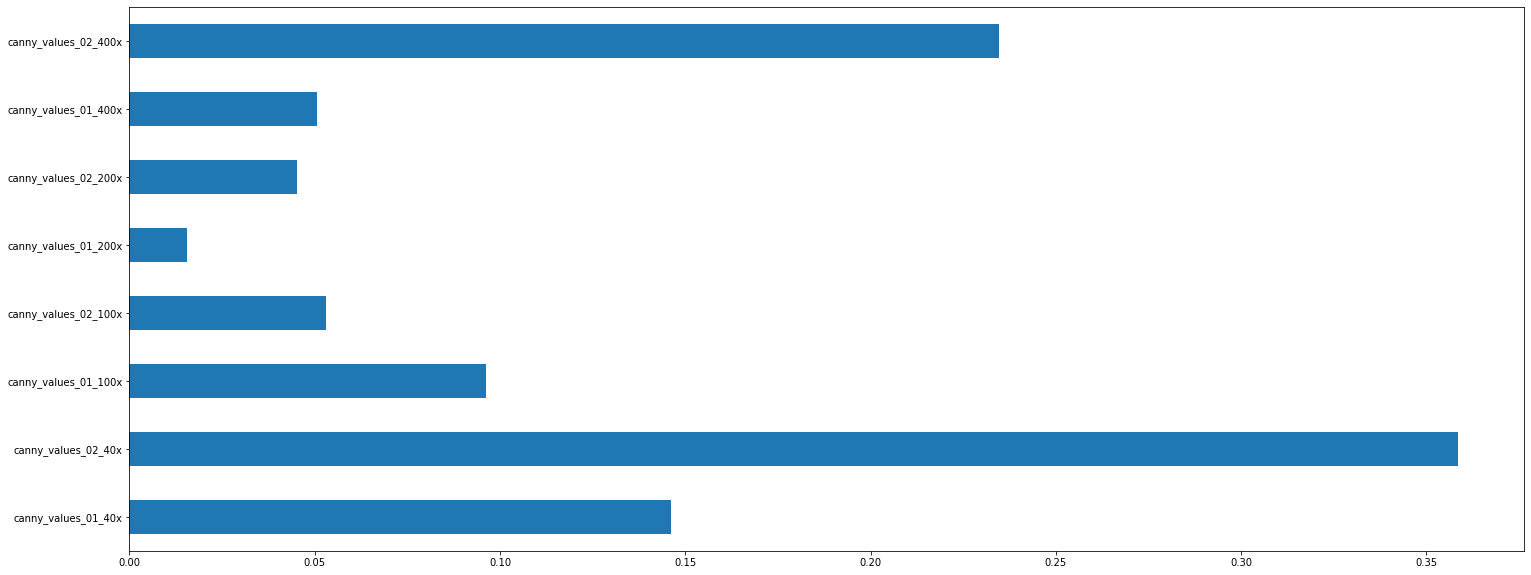

In [43]:
# Get a graph with the importance of each feature
%matplotlib inline
pd.Series(tree.feature_importances_, index = X.columns).plot.barh(figsize=(25, 10));

## Proceed to classification (processing)

### Dummy classifier
* Create a dummy classifier to get the worst cases to compare with
* It is expected that the tested classifiers get better results that the dummy one
* Use different strategies for the dummy **classifier**

In [44]:
for strategy in ['most_frequent', 'stratified', 'prior', 'uniform']:
  dummy = DummyClassifier(strategy = strategy, random_state = 0)
  # Fit
  start = time()
  dummy.fit(X_train_balanced, y_train_balanced)
  train_time = time() - start
  # Compute accuracy and prediction time
  start = time()
  score = dummy.score(X_test_scaled, y_test)
  predict_time = time() - start
  # Print results
  print("{:<15}| score = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(strategy, score, train_time, predict_time))

most_frequent  | score = 0.2920 | time = 0.001s/0.006s
stratified     | score = 0.5065 | time = 0.000s/0.002s
prior          | score = 0.2920 | time = 0.000s/0.001s
uniform        | score = 0.4961 | time = 0.000s/0.001s


### Logistic regression

In [45]:
#   ****************Logistic Regression*****************
#estimator = LogisticRegression(random_state=0, solver='liblinear', n_jobs=-1)
estimator = LogisticRegression(random_state=0, solver='sag', n_jobs=-1)
#estimator = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1, verbose=1)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Precision score of logistic regression classifier :: " , metrics.precision_score(y_test, y_pred, average=None, labels=logReg.classes_))
#print("Recall score of logistic regression classifier :: " , metrics.recall_score(y_test, y_pred, average=None, labels=logReg.classes_))
#print("F1 score of logistic regression classifier :: " , metrics.f1_score(y_test, y_pred, average=None, labels=logReg.classes_))

#print("ROC curve score of logistic regression classifier :: " , metrics.roc_score(y_test, y_pred, average=None, labels=logReg.classes_))

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
#disp.plot()
#plt.title("Confusion matrix")
#plt.figure(figsize=(10,10))
#plt.show()

#%sklearn inline
#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test_scaled, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
#metrics.RocCurveDisplay.from_predictions(y_test, y_pred, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(20,20))
plt.show()

# Check the section for multiclass
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# For displaying ROC curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator
# ROC curve with cross-validation
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test_scaled))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)

print("\nArea Under Curve (AUC) = {:.4f}".format(auc))
# Check examples for multiclass
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

Accuracy = 0.6382 | time = 0.489s/0.000s

Confusion matrix
[[ 61  52]
 [ 88 186]]


AttributeError: ignored

#### Cross-validation for logistic regression

In [46]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean cross-validation scores (Stratified CV) = 0.5812
Standard deviation for cross-validation scores (Stratified CV) = 0.0599
Reported cross-validation time = 2.667s
All cross-validation scores:
 [0.61358314 0.52586207 0.53560372 0.59203297 0.6109777  0.67155635
 0.59203297 0.51785714 0.48571429 0.66666667]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


### Multilayer Perceptron

In [48]:
#   ****************Multi-layer Perceptron*****************
#estimator = MLPClassifier(alpha=1)
#estimator = MLPClassifier(alpha=0.0001, solver='adam', verbose=True)
#estimator = MLPClassifier(alpha=0.0001, solver='adam', verbose=True, early_stopping=True)
estimator = MLPClassifier(alpha=0.001, tol=1e-3, solver='adam', verbose=True, early_stopping=True)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

Iteration 1, loss = 0.70681643
Validation score: 0.527273
Iteration 2, loss = 0.69661314
Validation score: 0.509091
Iteration 3, loss = 0.68734716
Validation score: 0.490909
Iteration 4, loss = 0.67936398
Validation score: 0.472727
Iteration 5, loss = 0.67182278
Validation score: 0.509091
Iteration 6, loss = 0.66469193
Validation score: 0.581818
Iteration 7, loss = 0.65795939
Validation score: 0.545455
Iteration 8, loss = 0.65144822
Validation score: 0.545455
Iteration 9, loss = 0.64561550
Validation score: 0.563636
Iteration 10, loss = 0.63998128
Validation score: 0.545455
Iteration 11, loss = 0.63441274
Validation score: 0.581818
Iteration 12, loss = 0.62933475
Validation score: 0.654545
Iteration 13, loss = 0.62431962
Validation score: 0.636364
Iteration 14, loss = 0.61975472
Validation score: 0.636364
Iteration 15, loss = 0.61520118
Validation score: 0.654545
Iteration 16, loss = 0.61081482
Validation score: 0.636364
Iteration 17, loss = 0.60687887
Validation score: 0.654545
Iterat

AttributeError: ignored

#### Cross-validation for Multilayer-Perceptron

In [49]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean cross-validation scores (Stratified CV) = 0.6185
Standard deviation for cross-validation scores (Stratified CV) = 0.0630
Reported cross-validation time = 0.541s
All cross-validation scores:
 [0.68926554 0.5045045  0.59427549 0.60990712 0.68507719 0.51278195
 0.68421053 0.62962963 0.64802744 0.62758621]


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


### Naive-Bayes

In [50]:
#   ****************Naive-Bayes*****************
estimator = GaussianNB()

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

Accuracy = 0.7468 | time = 0.002s/0.000s

Confusion matrix
[[ 56  57]
 [ 41 233]]


AttributeError: ignored

#### Cross-validation for Naive-Bayes

In [51]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

Mean cross-validation scores (Stratified CV) = 0.5893
Standard deviation for cross-validation scores (Stratified CV) = 0.0577
Reported cross-validation time = 0.061s
All cross-validation scores:
 [0.54545455 0.58899457 0.52912452 0.64213464 0.6625     0.59398496
 0.55       0.51785714 0.56323529 0.7       ]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


### Gaussian Process

In [52]:
#   ****************Gaussian Process classifier*****************
estimator = GaussianProcessClassifier(max_iter_predict=10, random_state=0, n_jobs=-1)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

NameError: ignored

#### Cross-validation for Gaussian-Process

In [53]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

Mean cross-validation scores (Stratified CV) = 0.5893
Standard deviation for cross-validation scores (Stratified CV) = 0.0577
Reported cross-validation time = 0.055s
All cross-validation scores:
 [0.54545455 0.58899457 0.52912452 0.64213464 0.6625     0.59398496
 0.55       0.51785714 0.56323529 0.7       ]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


### SVM

In [ ]:
#   ****************SVM 3th grade polynomial Kernel*****************
#estimator = SVC(kernel="poly")
#estimator = SVC(kernel="rbf")
#estimator = SVC(kernel="linear", verbose=True)
estimator = SVC(kernel="linear", gamma=0.001, verbose=True)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

#### Cross-validation for SVM

In [ ]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

### Decision tree

In [54]:
#   ****************Decision Tree*****************
#estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
#estimator = DecisionTreeClassifier(random_state=0)
estimator = DecisionTreeClassifier(max_depth=20, random_state=0)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

Accuracy = 0.9483 | time = 0.004s/0.000s

Confusion matrix
[[112   1]
 [ 19 255]]


AttributeError: ignored

In [ ]:
#print(f"Classes: {estimator.classes_}")
#print(f"Feature importance: {estimator.feature_importances_}")
#print(f"Max. features: {estimator.max_features}")
#print(f"Number of classes: {estimator.n_classes_}")
#print(f"Number of features: {estimator.n_features_}")
#print(f"Number of outputs: {estimator.n_outputs_}")

#print(f"Depth: {estimator.get_depth()}")
#print(f"Number of leaves: {estimator.get_n_leaves()}")

In [ ]:
#tree.plot_tree(decTree)
#plt.show()

#### Cross-validation for Decision Tree

In [55]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

Mean cross-validation scores (Stratified CV) = 0.9318
Standard deviation for cross-validation scores (Stratified CV) = 0.0378
Reported cross-validation time = 0.127s
All cross-validation scores:
 [0.92724868 0.89058355 0.90737564 0.8703259  1.         0.90737564
 0.98147513 0.94442539 0.94442539 0.94442539]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


### Random forest

In [56]:
#   ****************Random Forest*****************
#estimator = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
estimator = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=0, n_jobs=-1, verbose=2)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Accuracy = 0.9612 | time = 0.109s/0.103s

Confusion matrix
[[112   1]
 [ 14 260]]


AttributeError: ignored

In [ ]:
#print(f"Classes: {rf.classes_}")
#print(f"Feature importance: {rf.feature_importances_}")
#print(f"Max. features: {rf.max_features}")
#print(f"Number of classes: {rf.n_classes_}")
#print(f"Number of features: {rf.n_features_}")
#print(f"Number of outputs: {rf.n_outputs_}")

#print(f"Base estimator: {rf.base_estimator_}")
##print(f"Estimators: {rf.estimators_}")
#for estimator in rf.estimators_:
    #print(f"Estimator: {estimator}")

#### Cross-validation for Random Forest

In [57]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean cross-validation scores (Stratified CV) = 0.9556
Standard deviation for cross-validation scores (Stratified CV) = 0.0345
Reported cross-validation time = 1.137s
All cross-validation scores:
 [0.98181818 0.96362434 0.92551724 0.86996904 0.96291209 0.96296296
 1.         0.94442539 0.98147513 0.96291209]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


### K Neighbors

In [58]:
#   ****************K Neighbors classifier*****************
#estimator = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', n_jobs = 4)
estimator = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', n_jobs = -1)

# Fit
start = time()
estimator.fit(X_train_balanced, y_train_balanced)
train_time = time() - start

# Prediction
start = time()
y_pred = estimator.predict(X_test_scaled)
predict_time = time() - start

# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

# Pre-processing
y_pred = np.ravel(y_pred)

# Print results
print("Accuracy = {:.4f} | time = {:,.3f}s/{:,.3f}s".format(accuracy, train_time, predict_time))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=estimator.classes_)
print("\nConfusion matrix")
print(cm)

#metrics.ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, display_labels=estimator.classes_, normalize='all', cmap='Greys')
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=estimator.classes_, normalize='all', cmap='Greys')
plt.title("Confusion matrix")
plt.figure(figsize=(10,10))
plt.show()

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=4))

# ROC curve and AUC
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(estimator, X_test_scaled, y_test, alpha=0.8, lw=2, ax=ax)
ax.plot([0,1], [0,1], linestyle="--", lw=2, color = "r", label = "Change", alpha = 0.5)
plt.title("ROC Curve")
plt.figure(figsize=(10,10))
plt.show()

# Area Under Curve (AUC)

#auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test))
# Check this https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary
# where "estimator.predict_proba(X_test_scaled)[:, 1]" corresponds to the probability of the class with the "greater label", that is why the 1 as the index.
y_score = estimator.predict_proba(X_test_scaled)[:, 1]
auc = metrics.roc_auc_score(y_test, y_score)
print("\nArea Under Curve (AUC) = {:.4f}".format(auc))

Accuracy = 0.8475 | time = 0.002s/0.103s

Confusion matrix
[[103  10]
 [ 49 225]]


AttributeError: ignored

In [ ]:
#print(f"Classes: {knc.classes_}")
#print(f"Effective metric: {knc.effective_metric_}")
#print(f"Effective metric params: {knc.effective_metric_params_}")
#print(f"N. samples fit: {knc.n_samples_fit_}")

#### Cross-validation for KNN

In [59]:
start = time()
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=LeaveOneOut(), scoring='f1_macro', n_jobs=-1, verbose=1)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_scores = cross_val_score(estimator, X_train_balanced, y_train_balanced, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
cross_validation_time = time() - start
print("Mean cross-validation scores (Stratified CV) = {:.4f}".format(np.mean(cross_validation_scores)))
print("Standard deviation for cross-validation scores (Stratified CV) = {:.4f}".format(np.std(cross_validation_scores)))
print("Reported cross-validation time = {:,.3f}s".format(cross_validation_time))
print("All cross-validation scores:\n", cross_validation_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean cross-validation scores (Stratified CV) = 0.8612
Standard deviation for cross-validation scores (Stratified CV) = 0.0500
Reported cross-validation time = 0.553s
All cross-validation scores:
 [0.81666667 0.87255876 0.85164835 0.77747253 0.88827586 0.8125
 0.94442539 0.83327616 0.92592593 0.88888889]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


# AutoML with LazyPredict

In [60]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit
start = time()
models, predictions = clf.fit(X_train_balanced, X_test_scaled, y_train_balanced, y_test)
lazy_classifier_time = time() - start

# Print results
print("time = {:,.3f}s".format(lazy_classifier_time))

100%|██████████| 29/29 [00:01<00:00, 17.66it/s]

time = 1.662s


In [61]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.98               0.99    None      0.98   
XGBClassifier                      0.97               0.98    None      0.97   
LGBMClassifier                     0.97               0.98    None      0.97   
RandomForestClassifier             0.97               0.98    None      0.97   
DecisionTreeClassifier             0.94               0.95    None      0.94   
BaggingClassifier                  0.94               0.95    None      0.94   
LabelSpreading                     0.87               0.90    None      0.87   
ExtraTreeClassifier                0.88               0.89    None      0.88   
LabelPropagation                   0.86               0.89    None      0.87   
AdaBoostClassifier                 0.89               0.88    None      0.89   
KNeighborsClassifier               0.82 

# AutoML with auto-sklearn

In [ ]:
#automl = autosklearn.classification.AutoSklearnClassifier(
    #include_estimators=["decision_tree", "k_nearest_neighbors", "random_forest", ], exclude_estimators=None,
    #include_preprocessors=["fast_ica", "pca", "polynomial", "no_preprocessing", "truncatedSVD", ], exclude_preprocessors=None,
    #n_jobs=4)
#automl.fit(X_train, y_train)
#y_pred_auto = automl.predict(X_test)
#print("Accuracy score of AutoML", metrics.accuracy_score(y_test, y_pred_auto))

In [ ]:
#automl.cv_results_

In [ ]:
#automl.sprint_statistics()

In [ ]:
#automl.show_models()

In [ ]:
#print(automl.show_models())